In [1]:
# Import all required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import datetime as dt
import matplotlib.pyplot as plt
import folium 
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io


sns.set()

In [2]:
# Read dataset csv file

df = pd.read_csv(r"C:\Users\Adi\Desktop\Assignment\sf_business_dataset.csv", encoding='ANSI')

# Check the basic structure for all features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216649 entries, 0 to 216648
Data columns (total 26 columns):
Location Id                            216649 non-null object
Business Account Number                216649 non-null int64
Ownership Name                         216649 non-null object
DBA Name                               216649 non-null object
Street Address                         216645 non-null object
City                                   216380 non-null object
State                                  215969 non-null object
Source Zipcode                         216552 non-null float64
Business Start Date                    216649 non-null object
Business End Date                      43979 non-null object
Location Start Date                    216649 non-null object
Location End Date                      60244 non-null object
Mail Address                           216647 non-null object
Mail City                              216597 non-null object
Mail Zipcode           

In [3]:
# Assign active business/location flags

df['Active_business'] = np.where(df['Business End Date'].isnull(), 1, 0)
df['Active_location'] = np.where(df['Location End Date'].isnull(), 1, 0)

In [4]:
# Drop rows where Business Location is null

df_location = df.dropna(subset=['Business Location'])

In [5]:
# No city value missing
df_location.City.isnull().value_counts()

False    175113
True        258
Name: City, dtype: int64

In [6]:
#df[df['Business Location'].str.contains('(sf|francisco)', regex=True, case=False)]#.City.value_counts()

In [7]:
df_location['Business Location'].isnull().value_counts()

False    175371
Name: Business Location, dtype: int64

In [8]:
# add active business condition

In [9]:
df_location['lat'] = df_location['Business Location'].str.extract('\(([^()]*)\)', expand=True)\
                                                                    [0].str.split(',', expand=True)[0]

df_location['lon'] = df_location['Business Location'].str.extract('\(([^()]*)\)', expand=True)\
                                                                    [0].str.split(',', expand=True)[1]

df_location.dropna(subset=['lat', 'lon'], inplace=True)

df_location.lon.isnull().value_counts()

C:\Users\Adi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Adi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Adi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


False    171692
Name: lon, dtype: int64

In [10]:
df_location['lat'] = df_location['lat'].apply(pd.to_numeric, errors='coerce')
df_location['lon'] = df_location['lon'].apply(pd.to_numeric, errors='coerce')

C:\Users\Adi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Adi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df_location.rename(columns={'Neighborhoods - Analysis Boundaries': 'Neighborhood'}, inplace=True)

C:\Users\Adi\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
df_location.Neighborhood.isnull().value_counts()

False    115987
True      55705
Name: Neighborhood, dtype: int64

In [13]:
location = df_location[(df_location.Active_business == 1) & (df_location.Active_location == 1)]
location.dropna(subset=['Neighborhood'], inplace=True)

C:\Users\Adi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
location.Neighborhood.value_counts()

Financial District/South Beach    10392
Mission                            6268
Sunset/Parkside                    4435
South of Market                    4292
Bayview Hunters Point              3610
Outer Richmond                     3087
Marina                             2998
Chinatown                          2741
West of Twin Peaks                 2605
Nob Hill                           2450
Pacific Heights                    2378
Castro/Upper Market                2355
Tenderloin                         2247
Hayes Valley                       2072
Inner Richmond                     2010
Inner Sunset                       1922
Noe Valley                         1877
Russian Hill                       1811
North Beach                        1784
Potrero Hill                       1759
Bernal Heights                     1749
Haight Ashbury                     1634
Western Addition                   1514
Excelsior                          1440
Presidio Heights                   1364


Text(0.5, 1.0, 'Active businesses/location in SF Neighborhoods')

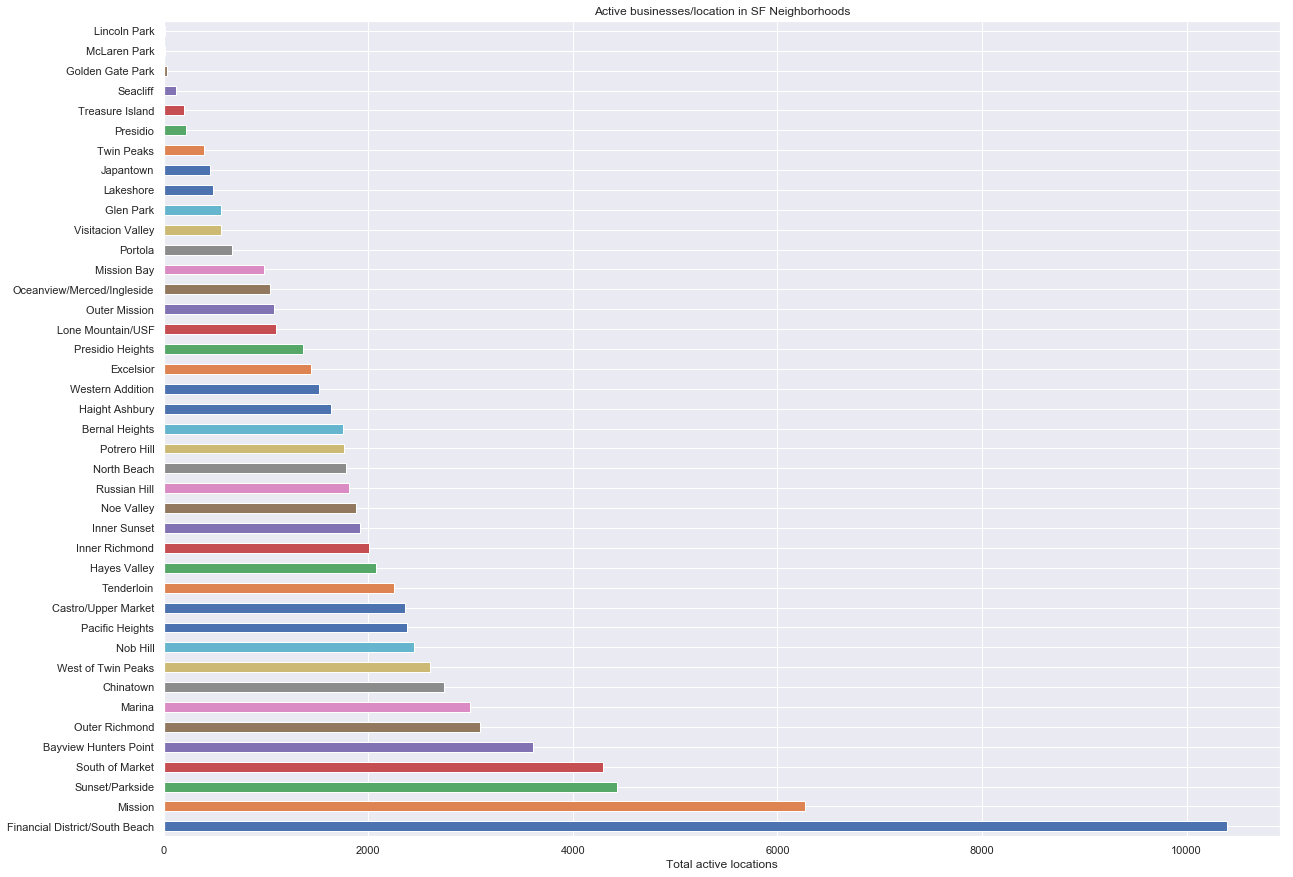

In [15]:
fig, ax = plt.subplots(figsize = (20, 15))
location.Neighborhood.value_counts().plot(kind='barh', ax=ax)

ax.set_xlabel('Total active locations')
ax.set_title('Active businesses/location in SF Neighborhoods')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


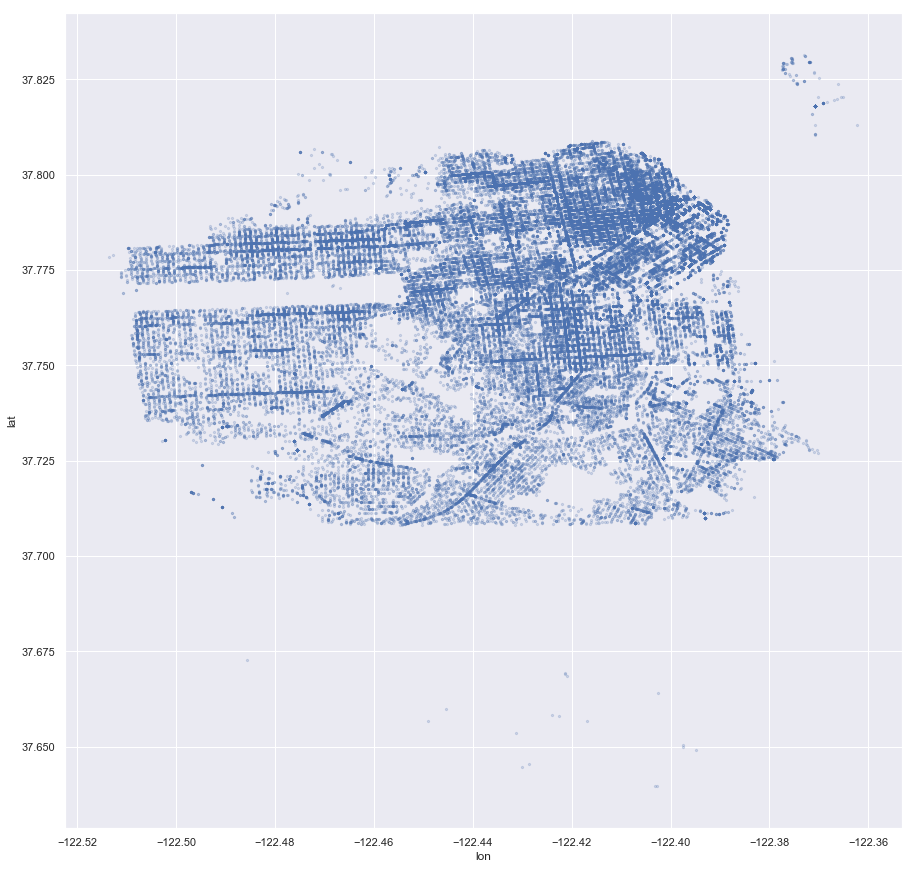

In [20]:
fig, ax = plt.subplots(figsize = (15, 15))
location.plot(kind="scatter", x="lon", y="lat", alpha=0.2, ax=ax, marker='.')
plt.show()

from IPython.display import HTML, display
m._build_map()
m, mapHeight = (400,500) # width and height of the displayed iFrame, in pixels
srcdoc = m.HTML.replace('"', '&quot;')
embed = HTML('<iframe srcdoc="{}" '
             'style="width: {}px; height: {}px; display:block; width: 50%; margin: 0 auto; '
             'border: none"></iframe>'.format(srcdoc, width, height))
embed

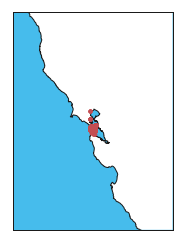

In [36]:
# read in data to use for plotted points
#buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = location['lat'].values
lon = location['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = '.', color='r', zorder=5)
plt.show()

In [17]:
# Remove bad data points

location[location.lat < 35]

Location Id  Business Account Number  \
12171   0190078-01-001                   190078   
38156   0386934-02-001                   386934   
133505  1030770-06-151                   355448   
212118  1030771-06-151                   355448   

                       Ownership Name                        DBA Name  \
12171   Sanchez-Corea A R & Assocs In  Sanchez A R-Corea & Assocs Inc   
38156     Stonehouse Ca Olive Oil Llc     Stonehouse Ca Olive Oil Llc   
133505              Naranjo Fred Jose    Scarborough Insurance Agency   
212118              Naranjo Fred Jose                             Sia   

                   Street Address           City State  Source Zipcode  \
12171   301 Junipero Serra Bl 270  San Francisco    CA         94127.0   
38156           1 The Embarcadero  San Francisco    CA         94111.0   
133505         99 The Embarcadero  San Francisco    CA         94105.0   
212118         99 The Embarcadero  San Francisco    CA         94105.0   

       Business Start Date Business End Date     ...     LIC Code  \
12171             7/1/1989               NaN     ...          NaN   
38156            10/1/2003               NaN     ...          H07   
133505            5/2/2002               NaN     ...          NaN   
212118            5/2/2002               NaN     ...          NaN   

                                LIC Code Description Supervisor District  \
12171                                            NaN                 7.0   
38156   Retail Food Market W/food Prep. Lt 5001 Sqft                 6.0   
133505                                           NaN                 3.0   
212118                                           NaN                 3.0   

                          Neighborhood Business Corridor  \
12171               West of Twin Peaks               NaN   
38156   Financial District/South Beach               NaN   
133505  Financial District/South Beach               NaN   
212118  Financial District/South Beach               NaN   

                                        Business Location Active_business  \
12171   301 JUNIPERO\rSan Francisco, CA 94127\r(34.098...               1   
38156   1 THE\rEMBARCADERO San Francisco, CA 94111\r(3...               1   
133505  99 THE\rEMBARCADERO SAN FRANCISCO, CA 94105\r(...               1   
212118  99 THE\rEMBARCADERO SAN FRANCISCO, CA 94105\r(...               1   

       Active_location        lat         lon  
12171                1  34.098835 -118.105624  
38156                1  32.625700 -117.136796  
133505               1  32.625751 -117.136767  
212118               1  32.625751 -117.136767  

[4 rows x 30 columns]

In [18]:
location.lat.sort_values(ascending=True)

38156     32.625700
133505    32.625751
212118    32.625751
12171     34.098835
59022     37.639680
35691     37.639680
124163    37.644538
97847     37.645520
211430    37.649080
206727    37.649799
150256    37.650364
133860    37.653460
147232    37.656684
12585     37.656826
134769    37.657929
69245     37.658209
155851    37.659985
135783    37.664050
45299     37.668434
142957    37.669164
62856     37.669186
153481    37.672672
130222    37.708130
34083     37.708214
32725     37.708214
108236    37.708222
88130     37.708255
113749    37.708260
72578     37.708270
72577     37.708270
            ...    
154841    37.829613
102306    37.830055
102299    37.830055
35077     37.830277
151450    37.830277
61353     37.830636
20942     37.830681
197107    37.830681
20943     37.830681
131923    37.831030
144016    37.831030
155448    37.831126
134961    37.831317
59519     37.960629
18823     37.960629
29068     37.960629
57657     37.960629
68587     37.960629
12976     37.960629


In [19]:
location.drop(location[(location.lat < 37) | (location.lat > 37.9)].index, inplace=True)

C:\Users\Adi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
location = df['Business Location'].str.split('(', expand=True)[1].str.split(')', expand=True)[0].str.split(',', expand=True)

In [22]:
df['lat'] = location[0]
df['lon'] = location[1]


In [23]:
df_active_business['lat'] = pd.to_numeric(df_active_business['lat'])

NameError: name 'df_active_business' is not defined

In [24]:
df_active_business.lat.isnull().value_counts()

NameError: name 'df_active_business' is not defined

In [25]:
df_active_business.lon.isnull().value_counts()

NameError: name 'df_active_business' is not defined

In [26]:
df_active_business = df[(df['Active_business'] == 1) & (df['Active_location'] == 1)]

In [27]:
df_active_business = df_active_business.dropna(subset=['lat', 'lon'])

In [28]:
active_neighborhoods = df_active_business.groupby(['Neighborhoods - Analysis Boundaries'])\
                                                    ['Active_business'].count().sort_values(ascending=False)

In [29]:
print("Active businesses:", active_neighborhoods)

Active businesses: Neighborhoods - Analysis Boundaries
Financial District/South Beach    10392
Mission                            6268
Sunset/Parkside                    4435
South of Market                    4292
Bayview Hunters Point              3610
Outer Richmond                     3087
Marina                             2998
Chinatown                          2741
West of Twin Peaks                 2605
Nob Hill                           2450
Pacific Heights                    2378
Castro/Upper Market                2356
Tenderloin                         2247
Hayes Valley                       2072
Inner Richmond                     2010
Inner Sunset                       1922
Noe Valley                         1877
Russian Hill                       1811
North Beach                        1785
Potrero Hill                       1759
Bernal Heights                     1749
Haight Ashbury                     1634
Western Addition                   1514
Excelsior                

In [30]:
import folium
from IPython.display import HTML

In [31]:
def display(m, height=300):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

In [21]:
map = folium.Map(location=[37.76, -122.45])
map.simple_marker([37.76, -122.45])
display(map)

AttributeError: 'Map' object has no attribute 'simple_marker'

In [25]:
SF_COORDINATES = (37.7749, -122.4194)
#crimedata = pd.read_csv('SFPD_Incidents_-_Current_Year__2015_.csv')
 
# for speed purposes
#MAX_RECORDS = 1000
  
# create empty map zoomed in on San Francisco
map = folium.Map(location=SF_COORDINATES, zoom_start=12)
 
# add a marker for every record in the filtered data, use a clustered view
for each in df_active_business.iterrows():
    folium.Marker(location = [each['lat'],each['lon']], clustered_marker = True)
  
display(map)

TypeError: tuple indices must be integers or slices, not str

In [73]:
NAICS = pd.read_excel(r"C:\Users\Adi\Desktop\Assignment\data_dictionary.xlsx", sheet_name='NAICS Codes')
NAICS

NAICS Code                                       Description
0   7210-7219                                   Accommodations 
1         NaN                                               NaN
2   5600-5699               Administrative and Support Services
3   7100-7199               Arts, Entertainment, and Recreation
4   8110-8139                                  Certain Services
5   2300-2399                                      Construction
6   5210-5239                                Financial Services
7   7220-7229                                     Food Services
8   5100-5199                                       Information
9   5240-5249                                         Insurance
10  3100-3399                                     Manufacturing
11  6100-6299             Private Education and Health Services
12  5400-5499  Professional, Scientific, and Technical Services
13  5300-5399       Real Estate and Rental and Leasing Services
14  4400-4599                                      Retail Trade
15  4800-4999                    Transportation and Warehousing
16  2200-2299                                         Utilities
17  4200-4299                                   Wholesale Trade
18  8100-8399                                  Certain Services

In [74]:
df_NAICS = df.dropna(subset=['NAICS Code'])

In [75]:
# Check if NAICS description is null for any rows

df_NAICS[df_NAICS['NAICS Code Description'].isnull()]['NAICS Code'].value_counts()

8100-8139    2483
Name: NAICS Code, dtype: int64

In [76]:
# Correcting NAICS code. Assumption - value should be 8110-8139

df_NAICS.loc[df_NAICS['NAICS Code Description'].isnull(), ['NAICS Code']] = '8110-8139'

In [77]:
df_NAICS = df_NAICS.merge(NAICS, on='NAICS Code')


In [78]:
df_NAICS['Description'].isnull().value_counts()

False    128933
Name: Description, dtype: int64

In [79]:
df_NAICS.drop(df_NAICS[df_NAICS.Active_business == 0].index, inplace=True)
df_NAICS.drop(df_NAICS[df_NAICS.Active_location == 0].index, inplace=True)
df_NAICS.dropna(subset=['Neighborhoods - Analysis Boundaries'], inplace=True)

In [80]:
less_popular = df_NAICS['Description'].value_counts(ascending=True)[:5].index

In [81]:
NAICS[NAICS.Description.isin(less_popular)].reset_index(drop=True)

NAICS Code                          Description
0  5600-5699  Administrative and Support Services
1  5100-5199                          Information
2  5240-5249                            Insurance
3  3100-3399                        Manufacturing
4  2200-2299                            Utilities

In [82]:
df_NAICS.head()

Location Id  Business Account Number               Ownership Name  \
2   0027660-01-001                    27660             Sunset Glass Inc   
8   0037683-02-001                    37683  Sand Joseph C Jr & Robert F   
9   0037683-03-001                    37683  Sand Joseph C Jr & Robert F   
10  0037683-04-001                    37683  Sand Joseph C Jr & Robert F   
11  0037683-05-001                    37683  Sand Joseph C Jr & Robert F   

                DBA Name  Street Address           City State  Source Zipcode  \
2       Sunset Glass Inc  4301 Irving St  San Francisco    CA         94122.0   
8   149-151 Dolores Apts  149 Dolores St  San Francisco    CA         94103.0   
9    262-298 Church Apts   262 Church St  San Francisco    CA         94114.0   
10  Sand Joseph C Co Inc   262 Church St  San Francisco    CA         94114.0   
11  2043-45 15th St Apts    2043 15th St  San Francisco    CA         94114.0   

   Business Start Date Business End Date      ...      LIC Code Description  \
2            10/1/1968               NaN      ...                       NaN   
8            10/1/1968               NaN      ...                       NaN   
9            10/1/1968               NaN      ...                       NaN   
10           10/1/1968               NaN      ...                       NaN   
11           10/1/1968               NaN      ...                       NaN   

   Supervisor District Neighborhoods - Analysis Boundaries Business Corridor  \
2                  4.0                     Sunset/Parkside               NaN   
8                  8.0                             Mission               NaN   
9                  8.0                 Castro/Upper Market               NaN   
10                 8.0                 Castro/Upper Market               NaN   
11                 8.0                 Castro/Upper Market               NaN   

                                    Business Location Active_business  \
2   4301 IRVING ST\rSan Francisco, CA 94122\r(37.7...               1   
8   149 DOLORES ST\rSan Francisco, CA 94103\r(37.7...               1   
9   262 CHURCH ST\rSan Francisco, CA 94114\r(37.76...               1   
10  262 CHURCH ST\rSan Francisco, CA 94114\r(37.76...               1   
11  2043 15TH ST\rSan Francisco, CA 94114\r(37.766...               1   

   Active_location        lat           lon   Description  
2                1  37.762385   -122.504083  Construction  
8                1  37.767197   -122.426579  Construction  
9                1   37.76636   -122.428841  Construction  
10               1   37.76636   -122.428841  Construction  
11               1  37.766098   -122.429681  Construction  

[5 rows x 31 columns]

In [61]:
df_industry = df.dropna(subset=['NAICS Code'])
df_industry[df_industry['NAICS Code Description'].isnull()]['NAICS Code'].value_counts()
df_industry.loc[df_industry['NAICS Code Description'].isnull(), ['NAICS Code']] = '8110-8139'
df_industry = df_industry.merge(NAICS, on='NAICS Code')

In [62]:
df_industry.dropna(subset=['Neighborhoods - Analysis Boundaries'], inplace=True)

In [65]:
df_industry['Location Start Date'] = pd.to_datetime(df_industry['Location Start Date'])
df_industry['year'] = df_industry['Location Start Date'].dt.year



In [83]:
df_industry.drop(df_industry[(df_industry['year'] < 1965)].index, inplace=True)

In [84]:
df_industry.groupby(['year', 'Description']).size().unstack('Description')

Description  Accommodations   Administrative and Support Services  \
year                                                                
1965                     NaN                                  NaN   
1966                     NaN                                  NaN   
1967                     NaN                                  NaN   
1968                    68.0                                 17.0   
1969                     4.0                                  2.0   
1970                     3.0                                 10.0   
1971                     9.0                                  4.0   
1972                    10.0                                  2.0   
1973                    13.0                                  2.0   
1974                    11.0                                  NaN   
1975                    16.0                                  2.0   
1976                    10.0                                  2.0   
1977                    11.0                                  NaN   
1978                     8.0                                  NaN   
1979                    10.0                                  NaN   
1980                     3.0                                  2.0   
1981                     9.0                                  1.0   
1982                     3.0                                  1.0   
1983                     4.0                                  NaN   
1984                     6.0                                  1.0   
1985                     5.0                                  4.0   
1986                    10.0                                  5.0   
1987                    14.0                                  5.0   
1988                    15.0                                  3.0   
1989                    18.0                                  5.0   
1990                     5.0                                  2.0   
1991                     7.0                                  2.0   
1992                     4.0                                  5.0   
1993                     7.0                                  6.0   
1994                     9.0                                  9.0   
1995                    10.0                                 10.0   
1996                    10.0                                 10.0   
1997                     8.0                                 16.0   
1998                    17.0                                 12.0   
1999                    18.0                                 22.0   
2000                    11.0                                 25.0   
2001                    17.0                                 23.0   
2002                    23.0                                 16.0   
2003                    23.0                                 34.0   
2004                    18.0                                 32.0   
2005                    25.0                                 39.0   
2006                    41.0                                 65.0   
2007                   115.0                                 39.0   
2008                    25.0                                 61.0   
2009                    40.0                                 84.0   
2010                    29.0                                 85.0   
2011                    45.0                                103.0   
2012                    81.0                                 96.0   
2013                    91.0                                123.0   
2014                   148.0                                219.0   
2015                   827.0                                112.0   
2016                   812.0                                243.0   
2017                   388.0                                186.0   
2020                     NaN                                  NaN   
2021                     2.0                                  NaN   
2024                     NaN                                  NaN  

In [56]:
data = df_industry.groupby(['year', 'Description']).size().unstack('Description')


In [57]:
columns = data.columns

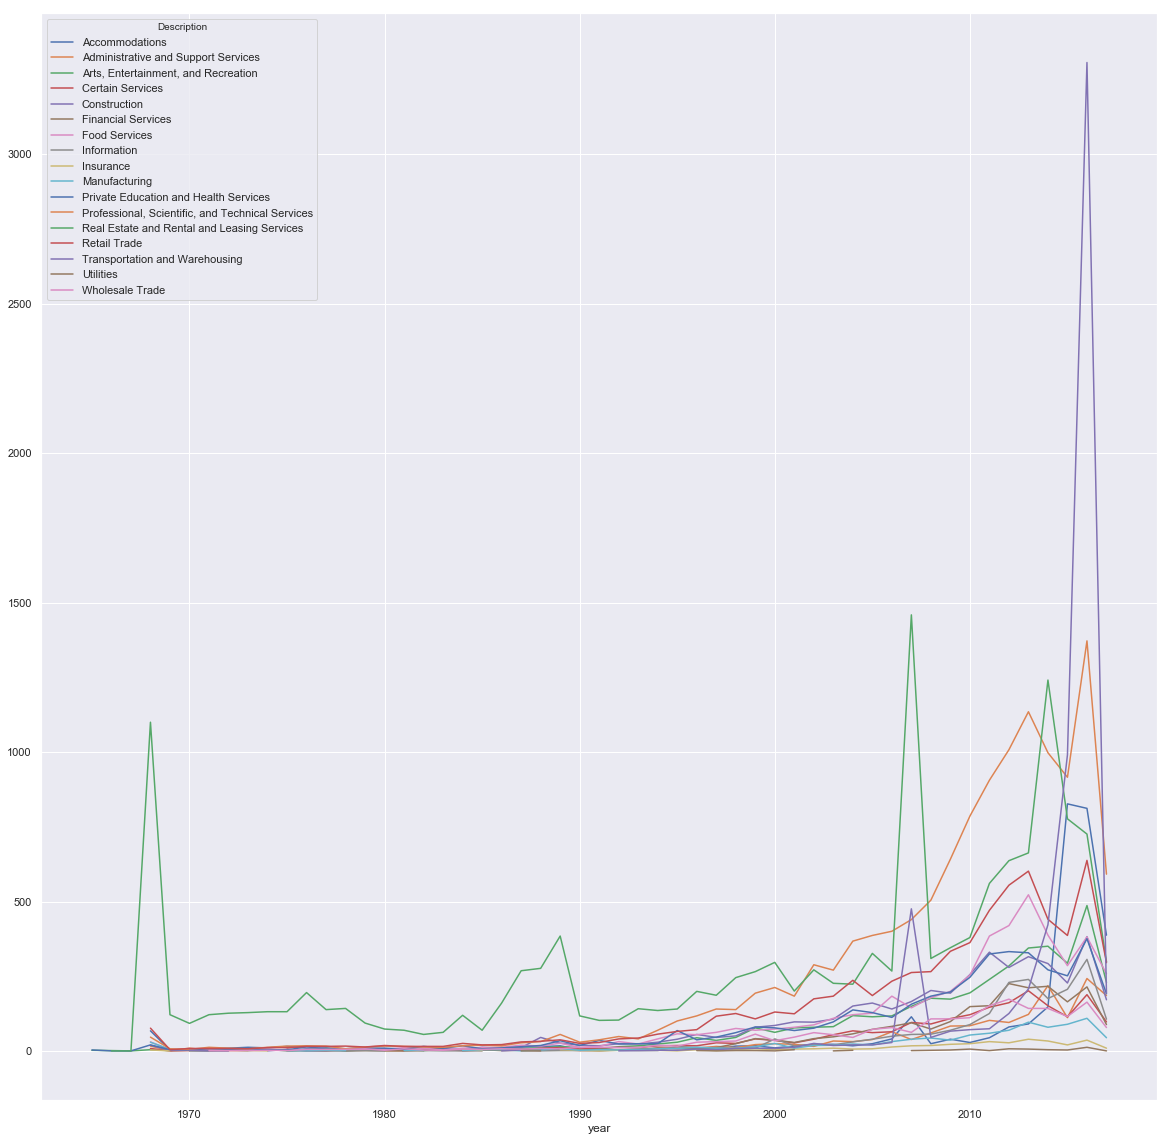

In [58]:
# Plot monthly s_ratio for all years 
fig, ax = plt.subplots(figsize=(20,20))
df_industry.groupby(['year', 'Description']).size().unstack('Description').plot(ax=ax)



In [66]:
df_industry.year

0         1968
1         1995
2         1968
8         1970
9         1970
10        1968
11        1990
14        2009
15        2010
16        1968
19        1988
20        2001
21        2001
22        2000
24        2000
25        1999
30        2001
34        2012
42        1969
45        1969
48        2005
49        1970
50        2014
52        1969
54        1970
56        2011
69        1968
72        2004
73        2004
74        1972
          ... 
128785    1996
128792    2010
128799    2014
128801    2007
128803    2014
128809    2015
128813    2015
128820    2015
128826    2015
128830    2016
128834    2016
128836    2016
128840    2016
128842    2016
128856    2010
128864    2016
128865    2016
128866    2016
128874    2016
128883    2016
128885    2016
128886    2016
128903    2017
128917    1998
128921    1997
128922    2003
128925    2000
128926    2012
128929    2014
128930    2016
Name: year, Length: 73170, dtype: int64